# cv19functions: Function creation library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cv19gm.utils import cv19functions

In [3]:
# Optional: For pop-up plots
if False:
    import platform
    OS = platform.system()

    if OS == 'Linux':    
        %matplotlib tk
        print('Linux')
    elif OS == 'Windows':
        %matplotlib qt
        print('Windows')
    elif OS == 'Darwin':
        %matplotlib tk
        print('Mac (Funciona?)')
    else:
        print('OS not detected :-|')

# Basic functions

## Events
Event function creates a function that returns the values that receives in the "values" argument during the ranges that it receives in the "days" argument. The function will return 0 during the days not comprehended in the days argument.
* values: A list or numpy array with the values
* days: A list with pairs of values that determine when the function will take the values

Overlaped day periods will return the sum of the correspondent values.

In [4]:
#Create time range
t = np.linspace(0,40,1000)

### Static values

In [5]:
Events = cv19functions.events(values=[0.45,0.85,1.3],days=[[0,10],[10,20],[23,28]])
Events2 = cv19functions.events(default=4,values=[0.45,0.85,1.3],days=[[0,10],[10,20],[23,28]])

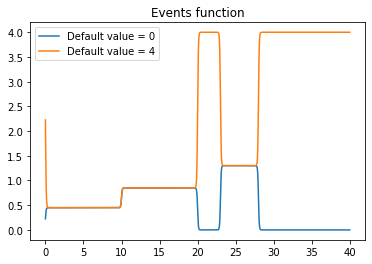

In [6]:
plt.plot(t,Events(t), label='Default value = 0')
plt.plot(t,Events2(t), label='Default value = 4')
plt.legend(loc=0)
plt.title('Events function')
plt.show()

### Using functions as values 

In [7]:
#Create time range
t = np.linspace(0,70,10000)

In [8]:
f1 = cv19functions.sine(period=4)
f2 = cv19functions.sigmoidal_transition(28,35,1.3,2.5)
f3 = cv19functions.quadratic_transition(40,45,2.5,1,concavity=0)
Events = cv19functions.events(values=[0.45,f1,1.3,f2,f3],days=[[0,10],[10,20],[23,28],[28,40],[40,60]])

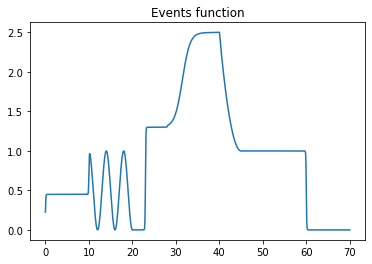

In [9]:
plt.plot(t,Events(t))
plt.title('Events function')
plt.show()

In [10]:
fconstructor = {
            "function": "events",
            "values": [
              0.3,
              {
                "function": "transition",
                "ftype": 0,
                "initvalue": 0.3,
                "endvalue": 1,
                "concavity": 0,
                "t_init":500,
                "t_end":510
              }
            ],
            "days": [
              [
                0,
                500
              ],
              [
                500,
                540
              ]
            ],
            "default": 0.3
          }

In [11]:
build1 = cv19functions.build(fconstructor)

In [12]:
t = np.linspace(490,520)

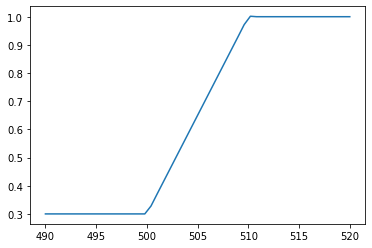

In [13]:
plt.plot(t,build1(t))
plt.show()

## Periodic functions
Creates functions that return the specified periodic function. It can create square, sine or sawtooth waves

In [14]:
#Create time ra1nge
t = np.linspace(0,70,1000)

In [15]:
square = cv19functions.square(min_val=0,max_val=1,period=14,t_init=0,t_end=1000,default=0,initphase=0,duty=0.5)
sine = cv19functions.sine(min_val=2,max_val=3,period=7,t_init=20,t_end=60,default=2,initphase=1)
sawtooth = cv19functions.sawtooth(min_val=4,max_val=5,period=14,t_init=0,t_end=1000,default=4,initphase=0,width=0)

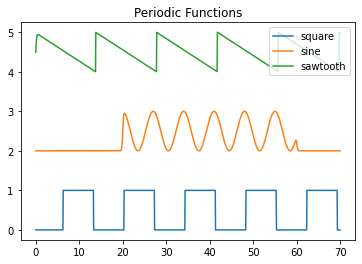

In [16]:
plt.plot(t,square(t),label='square')
plt.plot(t,sine(t),label='sine')
plt.plot(t,sawtooth(t),label='sawtooth')
plt.title('Periodic Functions')
plt.legend(loc=0)
plt.show()

## Value transition functions
Create functions that change their value in the specified fashion: linear, quadratic or sigmoidal

In [17]:
#Create time range
t = np.linspace(0,50,100)

In [18]:
linear1 = cv19functions.linear_transition(t_init=10,t_end=20,initvalue= 0, endvalue = 1)
linear2 = cv19functions.linear_transition(t_init=30,t_end=40,initvalue= 0, endvalue = -1)

quadratic1 = cv19functions.quadratic_transition(t_init=10,t_end=20,initvalue= 2, endvalue = 3, concavity=0)  
quadratic2 = cv19functions.quadratic_transition(t_init=30,t_end=40,initvalue= 0, endvalue = -1, concavity=0)    

quadratic3 = cv19functions.quadratic_transition(t_init=10,t_end=20,initvalue= 4, endvalue = 5, concavity=1)  
quadratic4 = cv19functions.quadratic_transition(t_init=30,t_end=40,initvalue= 0, endvalue = -1, concavity=1)    

sigmoid1 = cv19functions.sigmoidal_transition(t_init=10,t_end=20,initvalue= 6, endvalue = 7)
sigmoid2 = cv19functions.sigmoidal_transition(t_init=30,t_end=40,initvalue= 0, endvalue = -1)

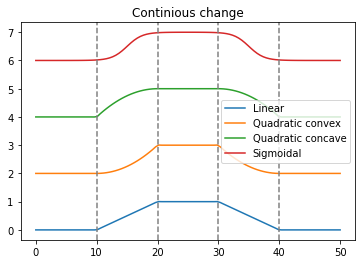

In [19]:
plt.plot(t,linear1(t)+linear2(t),label = 'Linear')
plt.plot(t,quadratic1(t)+quadratic2(t),label = 'Quadratic convex')
plt.plot(t,quadratic3(t)+quadratic4(t),label = 'Quadratic concave')
plt.plot(t,sigmoid1(t)+sigmoid2(t),label = 'Sigmoidal')

plt.axvline(10,linestyle='dashed',color='grey')
plt.axvline(20,linestyle='dashed',color='grey')
plt.axvline(30,linestyle='dashed',color='grey')
plt.axvline(40,linestyle='dashed',color='grey')

plt.title('Continious change')
plt.legend(loc=0)
plt.show()

# Function construtctor
The build function receives a string or dictionarie from which it builds the specified function. This is used when defining functions in the configuration file.

In [20]:
#Create time range
t = np.linspace(0,40,1000)

In [21]:
constructor = '{"function":"events","values":[0.45,0.85,1],"days":[[0,10],[10,20],[22,30]],"default":0}'
build1 = cv19functions.build(constructor)

input dict


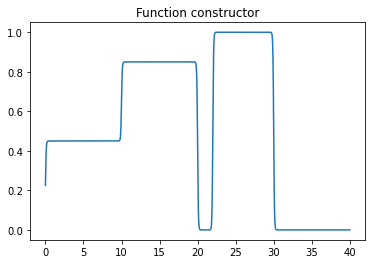

In [22]:
plt.plot(t,build1(t))
plt.title('Function constructor')
plt.show()

In [23]:
constructor_sine = '{"function":"sine","min_val":0,"max_val":1,"period":7}'
build2 = cv19functions.build(constructor_sine)

input dict


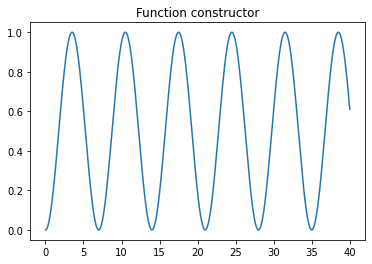

In [24]:
plt.plot(t,build2(t))
plt.title('Function constructor')
plt.show()

In [25]:
constructor = '{"function":"events","values":[0.45,0.85,{"function":"sine","min_val":0,"max_val":1,"period":7}],"days":[[0,10],[10,20],[22,50]],"default":0}'
build3 = cv19functions.build(constructor)

input dict


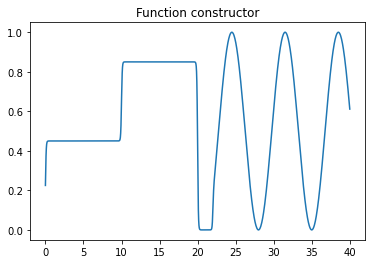

In [26]:
plt.plot(t,build3(t))
plt.title('Function constructor')
plt.show()

## Saturation
Builds a binary function that indicates when the sum of the arguments are bigger than the saturation function.

    Args:
        upperlimit (function or cv19function builder arg): Upper limit function

    Returns:
        saturationfunction (function): binary function with time multiple arguments that returns 1 when the arguments addition function
            Args:
                t (float): time value
                *args: multiple arguments which are added and then compared with the saturation value at time t
            Returns:
                int: 
                    0 when the functions given are smaller than the saturation function 
                    1 when they are bigger or equal

In [27]:
t = np.linspace(0,50,10000)

In [28]:
sat = cv19functions.saturation(2)
quadratic1 = cv19functions.quadratic_transition(t_init=10,t_end=20,initvalue= 1.5, endvalue = 2.5, concavity=0)  
quadratic2 = cv19functions.quadratic_transition(t_init=30,t_end=40,initvalue= 0, endvalue = -1, concavity=0)    

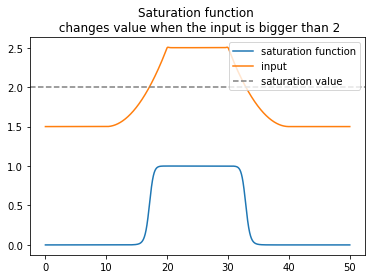

In [29]:
plt.plot(t,sat(t,quadratic1,quadratic2),label='saturation function')
plt.plot(t,cv19functions.func_add(quadratic1,quadratic2)(t),label='input')
plt.axhline(2,linestyle='dashed',color='grey',label='saturation value')
plt.legend(loc=0)
plt.title('Saturation function \n changes value when the input is bigger than 2')
plt.show()

# Transform data into a function
This function creates a function from a data array. The future values can be a static value or another function 

In [30]:
import numpy as np  

In [31]:
np.random.randint(-10,10)

2

In [32]:
# Creating random data
data = [np.random.randint(-10,10) for i in range(50)]

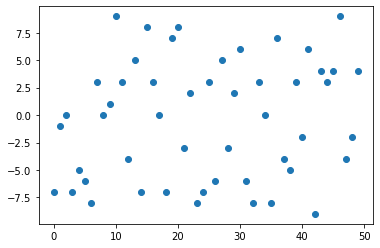

In [33]:
plt.scatter(range(len(data)),data)
plt.show()

In [34]:
function = cv19functions.data_function(data,np.mean(data[-5:]))

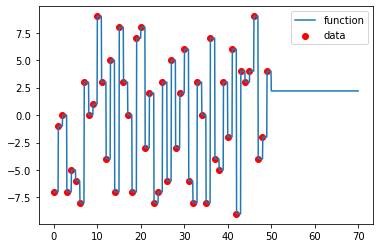

In [35]:
t = np.linspace(0,70,1000)
plt.plot(t,[function(i) for i in t],label='function')
plt.scatter(range(len(data)),data,label='data',color='red')
plt.legend(loc=0)
plt.show()